In [1]:
import pandas as pd

data = pd.read_csv('tnb101_micro.csv')

if 'use_path_encoding' not in data.columns:
    data['use_path_encoding']=False
data['use_path_encoding'].fillna(False, inplace=True)

data

C:\Users\marti\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,Unnamed: 0,cfg,dataset,data_seed,proxy,train_size,use_all_proxies,use_features,use_flops_params,use_onehot,use_path_encoding,features,tau,corr,fit_time,test_time
0,0,../zc_combine/configs/tnb101_full.json,normal,42.0,NaN,1024,False,True,True,False,False,NaN,0.614814,0.790337,1.783436,0.033019
1,1,../zc_combine/configs/tnb101_full.json,normal,43.0,NaN,1024,False,True,True,False,False,NaN,0.614964,0.795266,1.994052,0.054884
2,2,../zc_combine/configs/tnb101_full.json,normal,44.0,NaN,1024,False,True,True,False,False,NaN,0.614916,0.789974,1.718632,0.032478
3,3,../zc_combine/configs/tnb101_full.json,normal,45.0,NaN,1024,False,True,True,False,False,NaN,0.599426,0.779000,1.721620,0.035014
4,4,../zc_combine/configs/tnb101_full.json,normal,46.0,NaN,1024,False,True,True,False,False,NaN,0.603607,0.783472,1.580352,0.030355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20995,../zc_combine/configs/tnb101_full.json,class_scene,87.0,NaN,32,True,True,NaN,True,True,NaN,0.595704,0.789150,0.142381,0.020290
20996,20996,../zc_combine/configs/tnb101_full.json,class_scene,88.0,NaN,32,True,True,NaN,True,True,NaN,0.622825,0.807945,0.141534,0.019588
20997,20997,../zc_combine/configs/tnb101_full.json,class_scene,89.0,NaN,32,True,True,NaN,True,True,NaN,0.625466,0.820530,0.142932,0.019835
20998,20998,../zc_combine/configs/tnb101_full.json,class_scene,90.0,NaN,32,True,True,NaN,True,True,NaN,0.590101,0.772822,0.145639,0.020301


In [2]:
def feat_string(row):
    out = ''
    if row['use_all_proxies']:
        out += 'P'
    if row['use_features']:
        out += 'S'
    if row['use_onehot']:
        out += 'O'
    if row['use_flops_params'] or row['use_all_proxies']:
        out += 'F'
    if row['use_path_encoding']:
        out += 'E'
    if out == '':
        out = 'X'
        
    return out

features_str = {'X': 'None', 
                'O': 'Onehot', 
                'S': 'GRAF', 
                'OF': 'Onehot + F&P', 
                'SO': 'GRAF + Onehot', 
                'SF': 'GRAF + F&P', 
                'SOF': 'GRAF + Onehot + F&P', 
                'PF': 'ZCP + F&P', 
                'POF': 'ZCP + Onehot + F&P', 
                'PSF': 'ZCP + GRAF + F&P', 
                'PSOF': 'Everything',
                'OE': 'Onehot + PE', 
                'SE': 'GRAF + PE', 
                'OFE': 'Onehot + F&P + PE', 
                'SOE': 'GRAF + Onehot + PE', 
                'SFE': 'GRAF + F&P + PE', 
                'SOFE': 'GRAF + Onehot + F&P + PE', 
                'PFE': 'ZCP + F&P + PE', 
                'POFE': 'ZCP + Onehot + F&P + PE', 
                'PSFE': 'ZCP + GRAF + F&P + PE', 
                'PSOFE': 'Everything + PE'
               }

labels = ['O', 'S', 'OF', 'SO', 'SF', 'SOF', 'PF', 'POF', 'PSF', 'PSOF', 'OE', 'SE', 'OFE', 'SOE', 'SFE', 'SOFE', 'PFE', 'POFE', 'PSFE', 'PSOFE']

data['features'] = data.apply(feat_string, axis=1)
data

,Unnamed: 0,cfg,dataset,data_seed,proxy,train_size,use_all_proxies,use_features,use_flops_params,use_onehot,use_path_encoding,features,tau,corr,fit_time,test_time
0,0,../zc_combine/configs/tnb101_full.json,normal,42.0,NaN,1024,False,True,True,False,False,SF,0.614814,0.790337,1.783436,0.033019
1,1,../zc_combine/configs/tnb101_full.json,normal,43.0,NaN,1024,False,True,True,False,False,SF,0.614964,0.795266,1.994052,0.054884
2,2,../zc_combine/configs/tnb101_full.json,normal,44.0,NaN,1024,False,True,True,False,False,SF,0.614916,0.789974,1.718632,0.032478
3,3,../zc_combine/configs/tnb101_full.json,normal,45.0,NaN,1024,False,True,True,False,False,SF,0.599426,0.779000,1.721620,0.035014
4,4,../zc_combine/configs/tnb101_full.json,normal,46.0,NaN,1024,False,True,True,False,False,SF,0.603607,0.783472,1.580352,0.030355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20995,../zc_combine/configs/tnb101_full.json,class_scene,87.0,NaN,32,True,True,NaN,True,True,PSOFE,0.595704,0.789150,0.142381,0.020290
20996,20996,../zc_combine/configs/tnb101_full.json,class_scene,88.0,NaN,32,True,True,NaN,True,True,PSOFE,0.622825,0.807945,0.141534,0.019588
20997,20997,../zc_combine/configs/tnb101_full.json,class_scene,89.0,NaN,32,True,True,NaN,True,True,PSOFE,0.625466,0.820530,0.142932,0.019835
20998,20998,../zc_combine/configs/tnb101_full.json,class_scene,90.0,NaN,32,True,True,NaN,True,True,PSOFE,0.590101,0.772822,0.145639,0.020301


In [3]:
all_data = data[['dataset', 'train_size', 'features', 'data_seed', 'tau']]
all_data = all_data.set_index(['dataset', 'train_size', 'features', 'data_seed'])
all_data = all_data.unstack(3).T
all_data

dataset       autoencoder                                                    \
train_size           32                                                       
features                O        OE        OF       OFE        PF       PFE   
    data_seed                                                                 
tau 42.0         0.448623  0.477173  0.353043  0.476320  0.381997  0.391862   
    43.0         0.472012  0.505203  0.468237  0.538157  0.485385  0.526505   
    44.0         0.271206  0.271685  0.268277  0.263906  0.476194  0.487454   
    45.0         0.447629  0.503385  0.442303  0.502766  0.439060  0.498798   
    46.0         0.375814  0.483588  0.397173  0.469317  0.474422  0.563493   
    47.0         0.445734  0.479647  0.460481  0.481279  0.461246  0.506111   
    48.0         0.485588  0.508801  0.462552  0.511104  0.487819  0.517332   
    49.0         0.268788  0.293499  0.225624  0.291799  0.471358  0.498229   
    50.0         0.422539  0.465783  0.403465  0.464604  0.465615  0.470207   
    51.0         0.428920  0.472319  0.439683  0.470865  0.449012  0.459043   
    52.0         0.289672  0.333714  0.288954  0.379036  0.464840  0.503392   
    53.0         0.408658  0.363922  0.384089  0.383768  0.495251  0.534231   
    54.0         0.394507  0.415821  0.365229  0.413066  0.515140  0.556148   
    55.0         0.372250  0.471655  0.382377  0.485190  0.409469  0.497607   
    56.0         0.450867  0.533203  0.460649  0.528068  0.432870  0.500047   
    57.0         0.522490  0.467214  0.489243  0.486342  0.469642  0.534365   
    58.0         0.428265  0.481899  0.360731  0.455341  0.464040  0.470022   
    59.0         0.425697  0.443003  0.345634  0.338100  0.487004  0.475806   
    60.0         0.428545  0.485560  0.367866  0.438706  0.508617  0.521912   
    61.0         0.443112  0.537733  0.397926  0.535974  0.469231  0.523646   
    62.0         0.411753  0.480334  0.396796  0.478317  0.478693  0.550527   
    63.0         0.392741  0.438965  0.387190  0.434401  0.404633  0.477792   
    64.0         0.462021  0.484946  0.423946  0.480213  0.458718  0.485950   
    65.0         0.384998  0.484273  0.376069  0.473330  0.483462  0.505638   
    66.0         0.472467  0.515086  0.398503  0.511535  0.401946  0.459444   
    67.0         0.444525  0.488841  0.414096  0.472164  0.471776  0.512027   
    68.0         0.386178  0.370519  0.401951  0.364592  0.499287  0.488592   
    69.0         0.444872  0.461017  0.336292  0.409555  0.477272  0.535823   
    70.0         0.406763  0.420498  0.414044  0.420534  0.394608  0.471671   
    71.0         0.415728  0.487428  0.425795  0.486679  0.452769  0.472229   
    72.0         0.442808  0.504454  0.431128  0.496055  0.434589  0.512512   
    73.0         0.451600  0.531204  0.459936  0.543633  0.447364  0.543243   
    74.0         0.418354  0.444321  0.420425  0.445109  0.456053  0.473899   
    75.0         0.324110  0.424198  0.236731  0.407496  0.343313  0.342349   
    76.0         0.382361  0.445684  0.361471  0.430837  0.441623  0.473105   
    77.0         0.445548  0.509010  0.324138  0.421720  0.517330  0.557018   
    78.0         0.437315  0.480847  0.329985  0.377106  0.433371  0.450538   
    79.0         0.449707  0.488906  0.441434  0.487836  0.376769  0.424680   
    80.0         0.430740  0.533332  0.459228  0.537714  0.427250  0.445980   
    81.0         0.405685  0.380666  0.405428  0.410265  0.468343  0.512032   
    82.0         0.282880  0.411413  0.211684  0.345705  0.456484  0.507412   
    83.0         0.436591  0.503496  0.429974  0.500843  0.461493  0.527037   
    84.0         0.418366  0.419744  0.412889  0.399055  0.511221  0.549968   
    85.0         0.432117  0.451533  0.410348  0.378872  0.450651  0.446998   
    86.0         0.476828  0.468607  0.414228  0.399621  0.464082  0.477902   
    87.0         0.524748  0.538720  0.471599  0.526151  0.450251  0.465265   
    88.0         0.449297  0.543471  0.365648  0.5

In [4]:
table_mean = all_data.mean().unstack()
table_std = all_data.std().unstack()

cols = [c for c in labels if c in table_mean.columns]

table_mean = table_mean[cols]
table_std = table_std[cols]
cols = [features_str[f] for f in cols]
table_mean.columns = cols
table_std.columns = cols

table_mean

Onehot      GRAF  Onehot + F&P  GRAF + Onehot  \
dataset         train_size                                                    
autoencoder     32          0.421313  0.556843      0.394335       0.553655   
                128         0.548206  0.594436      0.542333       0.593622   
                1024        0.603622  0.626714      0.603980       0.627096   
class_object    32          0.234895  0.532616      0.458404       0.529090   
                128         0.407574  0.602710      0.548253       0.600464   
                1024        0.614788  0.635613      0.621062       0.637634   
class_scene     32          0.288730  0.578467      0.511530       0.575408   
                128         0.508904  0.673935      0.609074       0.671926   
                1024        0.721328  0.747091      0.721052       0.752149   
jigsaw          32          0.220700  0.468788      0.413653       0.468815   
                128         0.351782  0.534266      0.489417       0.534530   
                1024        0.526285  0.572890      0.555687       0.577282   
normal          32          0.312486  0.497744      0.464070       0.492920   
                128         0.478225  0.544988      0.525458       0.547507   
                1024        0.551938  0.599649      0.595424       0.601121   
room_layout     32          0.200374  0.670581      0.585850       0.662958   
                128         0.363449  0.736817      0.679315       0.735959   
                1024        0.666984  0.783519      0.770297       0.785014   
segmentsemantic 32          0.419280  0.680432      0.624736       0.682903   
                128         0.640405  0.749969      0.693921       0.753892   
                1024        0.790092  0.810502      0.781490       0.818240   

                            GRAF + F&P  GRAF + Onehot + F&P  ZCP + F&P  \
dataset         train_size                                               
autoencoder     32            0.557512             0.553251   0.459022   
                128           0.594830             0.593993   0.519493   
                1024          0.626479             0.626283   0.558745   
class_object    32            0.530995             0.524659   0.408889   
                128           0.601996             0.599850   0.526179   
                1024          0.635773             0.637896   0.595026   
class_scene     32            0.579700             0.573526   0.517780   
                128           0.671787             0.672135   0.601883   
                1024          0.746838             0.753042   0.714082   
jigsaw          32            0.468426             0.467235   0.383736   
                128           0.534987             0.535054   0.463346   
                1024          0.574025             0.578783   0.541875   
normal          32            0.498707             0.496277   0.478363   
                128           0.546959             0.550082   0.525163   
                1024          0.609254             0.612095   0.587558   
room_layout     32            0.670570             0.665898   0.608743   
                128           0.738930             0.738006   0.717225   
                1024          0.785984             0.787715   0.775395   
segmentsemantic 32            0.679803             0.684085   0.622247   
                128           0.744508             0.750335   0.682198   
                1024          0.810244             0.818721   0.736128   

                            ZCP + Onehot + F&P  ZCP + GRAF + F&P  Everything  \
dataset         train_size                                                     
autoencoder     32                    0.483622          0.553337    0.552670   
                128                   0.554785          0.595638    0.595692   
                1024                  0.598803          0.634199    0.634043   
class_object    32                    0.433837          0.503990    0.506323   
                128          

In [5]:
table = pd.merge(table_mean, table_std, left_index=True, right_index=True, suffixes=('_mean', '_std'))

def pm_formatter(x):
    return f'${x[0]:.2f}' + '^{' + f'{x[1]:.2f}' + '}$'

table_str = pd.DataFrame()
for c in cols:
    table_str[c] = table[[f'{c}_mean', f'{c}_std']].apply(tuple, axis=1)
table_str

Onehot  \
dataset         train_size                                               
autoencoder     32          (0.42131337433001564, 0.05624899815157225)   
                128          (0.5482058211543945, 0.01870653762409465)   
                1024        (0.6036222576886772, 0.008387574631852848)   
class_object    32          (0.23489499032400288, 0.05896682705600237)   
                128         (0.40757382369206757, 0.04089046344679707)   
                1024        (0.6147879761881972, 0.012127927248098469)   
class_scene     32           (0.2887297503645147, 0.05862527850388877)   
                128          (0.5089043370203418, 0.04279409255393078)   
                1024        (0.7213284808260377, 0.010796438135378622)   
jigsaw          32           (0.2207003257685848, 0.05323758307374539)   
                128          (0.3517823446373656, 0.03442509114435134)   
                1024        (0.5262849274325947, 0.011703967363664781)   
normal          32          (0.31248589749553973, 0.05627180288658978)   
                128         (0.47822487270797714, 0.02945677752265107)   
                1024        (0.5519379025738749, 0.010549910840146528)   
room_layout     32           (0.2003743244970831, 0.07340785723484274)   
                128          (0.3634489743038373, 0.04303328813326627)   
                1024        (0.6669838762548757, 0.036007320934218566)   
segmentsemantic 32           (0.4192804517829179, 0.06579232223508408)   
                128          (0.6404054550507564, 0.02862123074387072)   
                1024         (0.7900918495825144, 0.00603177777432193)   

                                                                   GRAF  \
dataset         train_size                                                
autoencoder     32           (0.5568433408681017, 0.030300641200930966)   
                128          (0.5944363524344953, 0.012474771538213879)   
                1024         (0.6267138770313302, 0.008365342202978267)   
class_object    32             (0.5326160647975239, 0.0346813651725688)   
                128           (0.602710365146897, 0.012601638494659407)   
                1024         (0.6356126920585217, 0.010001930234267594)   
class_scene     32            (0.5784668927506504, 0.03446640929819958)   
                128          (0.6739346087943122, 0.014650293124507045)   
                1024          (0.7470911069823307, 0.00782062708433269)   
jigsaw          32           (0.46878848443921484, 0.03346631389814326)   
                128          (0.5342663314803187, 0.015143814455023047)   
                1024         (0.5728896416796527, 0.011515808525299097)   
normal          32           (0.4977435339741423, 0.040063685619245365)   
                128          (0.5449881232943214, 0.020287558687811104)   
                1024         (0.5996492874494507, 0.011510492310204434)   
room_layout     32            (0.6705805105609854, 0.03368256522811718)   
                128          (0.7368170790908475, 0.013884429953786278)   
                1024         (0.7835191446919133, 0.006349865398712821)   
segmentsemantic 32            (0.6804321732028368, 0.03048428711224278)   
                128            (0.7499688279553025, 0.0155434178957461)   
                1024        (0.8105024536284688, 0.0056757266692478514)   

                                                           Onehot + F&P  \
dataset         train_size                                                
autoencoder     32           (0.39433518325506883, 0.06529893856507621)   
                128          (0.5423329430413283, 0.027434560716485618)   
                1024         (0.6039797392488457, 0.009442367139994115)   
class_object    32            (0.4584039561171551, 0.05487954303617039)   
                128          (0.5482529522731582, 0.017917953608313397)   
                1024         (0.6210620445756188, 0.010465137180770707)   
class_scene     32            (0.51

In [6]:
show = sorted([ix for ix in table.index], key=lambda x: (x[0], int(x[1])))
esc_labels = [l.replace('F&P', 'F\&P') for l in cols]
table_str.columns=esc_labels
table_str = table_str.loc[show].T

#columns are now different targets and different train size, rows are different feature sets

# here, you can specify which targets will be shown in the table - up to 3 targets fit on the page in ICML pdf
# the string is part of the table caption (see the `start` variable below for the whole caption)
# it is possible to generate multiple tables at once, if you specify multiple tuples of (caption/targets)
# if you change the number of targets, you also should change the `column_format` in the longest line below, or fix it manually, after the tables are generated)
c_sets = [(' different tasks on the Trans-NAS-Bench-101 micro benchmark', ['autoencoder', 'class_object', 'class_scene'])]

start="""\\begin{table}
\\small
\\addtolength{\\tabcolsep}{-0.2em}
\\centering
\\caption{Results on %s. Average and standard deviation of Kendall's tau over 50 independent runs.}
\\vskip 0.15in"""

end="""\\end{table}"""

# here, it is possible to specify, the position of horizontal lines in the table (numbers are indices of lines after which a hline will be added, only lines with values, without header, count)
hlines = [0,6]

#the tables are also saved to a file - you can change the filename here
with open('result_tables.tex', 'w') as f:
    for task, columns in c_sets:
        out = table_str[columns].style.highlight_max(axis=0, props='font-weight:bold').format(formatter=pm_formatter).to_latex(convert_css=True, column_format='r|ccc|ccc|ccc', multicol_align='|c')
        out = out.replace('_', '\_').replace('\\bfseries', '\\boldmath').replace("Features", "GRAF")
        out = out.splitlines()
        for (i,h) in enumerate(hlines):
            out[h+3+i:h+3+i] = ['\\hline']
        f.write(start % task)
        print(start % task)
        f.write('\n'.join(out))
        print('\n'.join(out))
        f.write(end)
        print(end)
        print()

\begin{table}
\small
\addtolength{\tabcolsep}{-0.2em}
\centering
\caption{Results on  different tasks on the Trans-NAS-Bench-101 micro benchmark. Average and standard deviation of Kendall's tau over 50 independent runs.}
\vskip 0.15in
\begin{tabular}{r|ccc|ccc|ccc}
dataset & \multicolumn{3}{|c}{autoencoder} & \multicolumn{3}{|c}{class\_object} & \multicolumn{3}{|c}{class\_scene} \\
train\_size & 32 & 128 & 1024 & 32 & 128 & 1024 & 32 & 128 & 1024 \\
\hline
Onehot & $0.42^{0.06}$ & $0.55^{0.02}$ & $0.60^{0.01}$ & $0.23^{0.06}$ & $0.41^{0.04}$ & $0.61^{0.01}$ & $0.29^{0.06}$ & $0.51^{0.04}$ & $0.72^{0.01}$ \\
GRAF & $0.56^{0.03}$ & $0.59^{0.01}$ & $0.63^{0.01}$ & \boldmath $0.53^{0.03}$ & $0.60^{0.01}$ & $0.64^{0.01}$ & $0.58^{0.03}$ & $0.67^{0.01}$ & $0.75^{0.01}$ \\
Onehot + F\&P & $0.39^{0.07}$ & $0.54^{0.03}$ & $0.60^{0.01}$ & $0.46^{0.05}$ & $0.55^{0.02}$ & $0.62^{0.01}$ & $0.51^{0.03}$ & $0.61^{0.02}$ & $0.72^{0.01}$ \\
GRAF + Onehot & $0.55^{0.03}$ & $0.59^{0.01}$ & $0.63^{0.01}$ 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rcParams.update({'text.usetex': True, 'font.family': 'serif', 'text.latex.preamble': '\\usepackage{times} ', 'figure.figsize': (3.25, 2.0086104634371584), 'figure.constrained_layout.use': True, 'figure.autolayout': False, 'savefig.bbox': 'tight', 'savefig.pad_inches': 0.015, 'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 6, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'axes.titlesize': 8})

#O = Onehot, S = GRAF, F = flops+params, P = ZCP, E = path encoding
def_labels = ['O', 'S', 'OF', 'SO', 'SF', 'SOF', 'PF', 'POF', 'PSF', 'PSOF']

def plot_experiments(all_data, targets, train_sizes, file_name=None, labels=def_labels):
    fig_width = 487.8225/72.27 # \the\textsize / points per inch
    n_ts = len(train_sizes)
    n_tg = len(targets)
    
    plt.subplots(n_ts, n_tg, sharey=True, figsize=(fig_width, n_ts*2))

    for (si,ts) in enumerate(train_sizes):
        for (ti,target) in enumerate(targets):

            plt_data = all_data[target][ts]
            cols = [c for c in labels if c in plt_data.columns]
            plt_data = plt_data[cols]
            cols = [features_str[f].replace('&', '\&') for f in cols]
            plt_data.columns=cols

            plt.subplot(n_ts, n_tg, n_tg*si+ti+1)
            sns.boxplot(plt_data, orient='h', linecolor="#137", palette=[sns.color_palette()[0] if 'GRAF' in c else sns.color_palette()[1] for c in cols])
            if si == 0:
                plt.title(f'{target}')
            if ti == 0:
                plt.ylabel(f'Training size: {ts}')
    
    if file_name:
        plt.savefig(f'{file_name}.pdf')
    plt.show()


In [8]:
print("All targets:", list(all_data.columns.get_level_values(0).unique()))
print("All train_sizes:", list(all_data.columns.get_level_values(1).unique()))

All targets: ['autoencoder', 'class_object', 'class_scene', 'jigsaw', 'normal', 'room_layout', 'segmentsemantic']
All train_sizes: [32, 128, 1024]


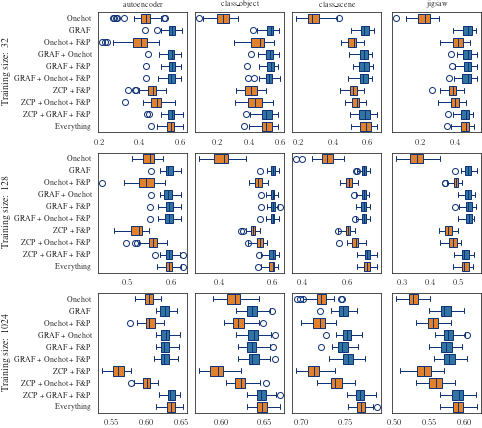

In [9]:
plot_experiments(all_data, ['autoencoder', 'class_object', 'class_scene', 'jigsaw'], [32, 128, 1024], file_name='tnb101-micro-1.pdf')